Statistical Analysis and Prediction of Health Outcomes Using Multiple Linear Regression

1.Introduction:

2.Problem Statement:

3. Data Set and Feature Description:

| Feature Name                       | Data Type     | Description                                                                                                        |
| ---------------------------------- | ------------- | ------------------------------------------------------------------------------------------------------------------ |
| **Age**                            | Float         | Represents the age of the individual in years. Used to analyze the effect of aging on health.                      |
| **BMI**                            | Float         | Body Mass Index (kg/m²) indicating body fat based on height and weight. Higher values may indicate health risks.   |
| **Exercise_Frequency**             | Integer       | Number of physical activity or workout sessions per week. Indicates level of physical activity.                    |
| **Diet_Quality**                   | Float         | Numerical score representing the quality of diet. Higher values indicate healthier dietary habits.                 |
| **Sleep_Hours**                    | Float         | Average number of hours the individual sleeps per day. Reflects rest and recovery quality.                         |
| **Smoking_Status**                 | Integer (0/1) | Binary variable indicating smoking behavior: **1 = Smoker**, **0 = Non-Smoker**.                                   |
| **Alcohol_Consumption**            | Float         | Average units of alcohol consumed per week. Reflects alcohol intake behavior.                                      |
| **Health_Score (Target Variable)** | Float         | Continuous numerical value representing overall health status. This is the dependent variable used for prediction. |


4. Data Loading:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
hd = pd.read_csv(r"C:\Users\INDU PRIYA\OneDrive\Attachments\Desktop\ML Models\synthetic_health_data.csv")
hd

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894
...,...,...,...,...,...,...,...,...
995,36.626796,30.350751,1,60.674477,8.470913,0,3.823116,67.993747
996,61.572238,24.867394,3,66.527725,5.355398,1,5.597395,72.377621
997,47.690114,20.590627,4,69.819819,8.641864,0,8.195167,100.000000
998,33.145852,24.184665,6,70.724204,7.941557,0,3.676134,100.000000


5.Initial Analysis:

In [3]:
hd.shape

(1000, 8)

In [4]:
hd.dtypes

Age                    float64
BMI                    float64
Exercise_Frequency       int64
Diet_Quality           float64
Sleep_Hours            float64
Smoking_Status           int64
Alcohol_Consumption    float64
Health_Score           float64
dtype: object

In [5]:
hd.isnull().sum()

Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64

In [6]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [7]:
hd.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.231985,25.354181,2.888000,69.952977,6.973135,0.499000,3.079377,85.479947
std,11.750591,4.987272,1.995354,14.972061,1.517218,0.500249,2.084564,13.633845
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.228916,21.968792,1.000000,59.945481,5.903351,0.000000,1.644111,76.430819
50%,40.303607,25.315386,3.000000,69.975151,6.990847,0.000000,3.064261,87.498996
75%,47.775327,28.644411,5.000000,80.527839,8.054595,1.000000,4.489293,99.762644
max,86.232778,40.965538,6.000000,110.265186,11.638962,1.000000,11.105100,100.000000


In [8]:
hd.duplicated().sum()

0

5. Data Transformation:

In [9]:
hd['Smoking_Status'] = hd['Smoking_Status'].map({'No': 0, 'Yes': 1})

In [10]:
hd.dtypes

Age                    float64
BMI                    float64
Exercise_Frequency       int64
Diet_Quality           float64
Sleep_Hours            float64
Smoking_Status         float64
Alcohol_Consumption    float64
Health_Score           float64
dtype: object

6.Exploratory Data Analysis:

6.1 Outlier Detection:

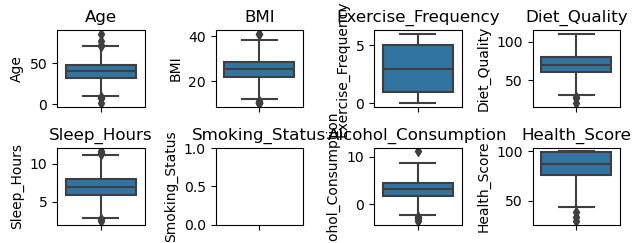

In [11]:
numeric_cols = hd.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=hd[col])
    plt.title(col)
plt.tight_layout()
plt.show()

6.2 Univariate Analysis:

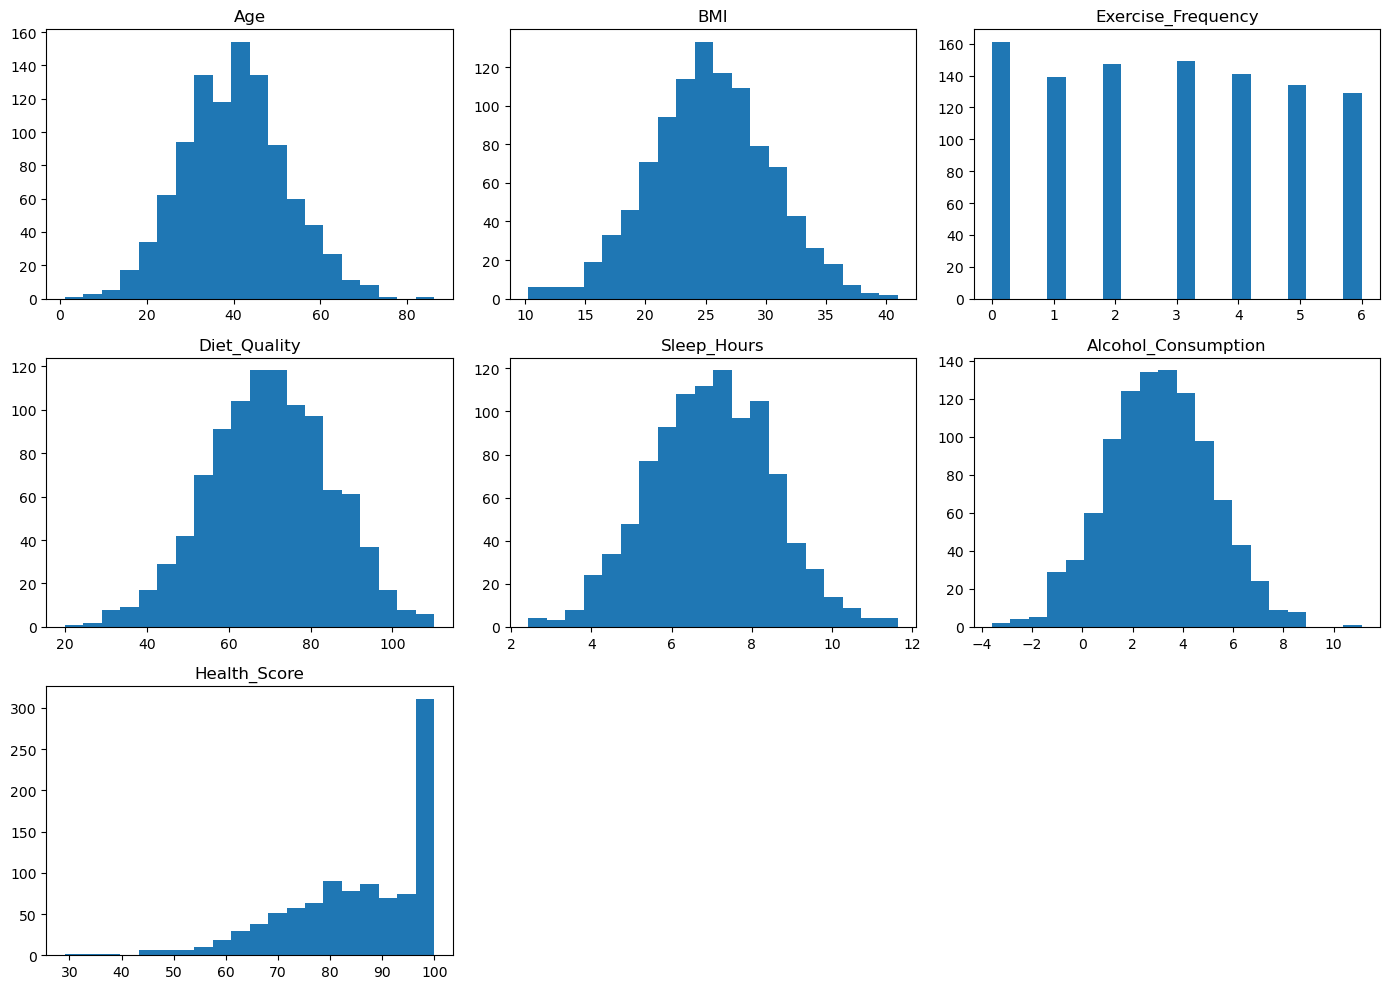

In [12]:
plt.figure(figsize=(14, 10))

plot_index = 1
numeric_cols = [
    'Age','BMI','Exercise_Frequency','Diet_Quality',
    'Sleep_Hours','Alcohol_Consumption','Health_Score','Smoking_Status'
]

for col in numeric_cols:
    data = hd[col].dropna()

    if data.empty:
        continue

    plt.subplot(3, 3, plot_index)
    plt.hist(data, bins=20)
    plt.title(col)

    plot_index += 1

plt.tight_layout()
plt.show()


6.3 Relationship with target:

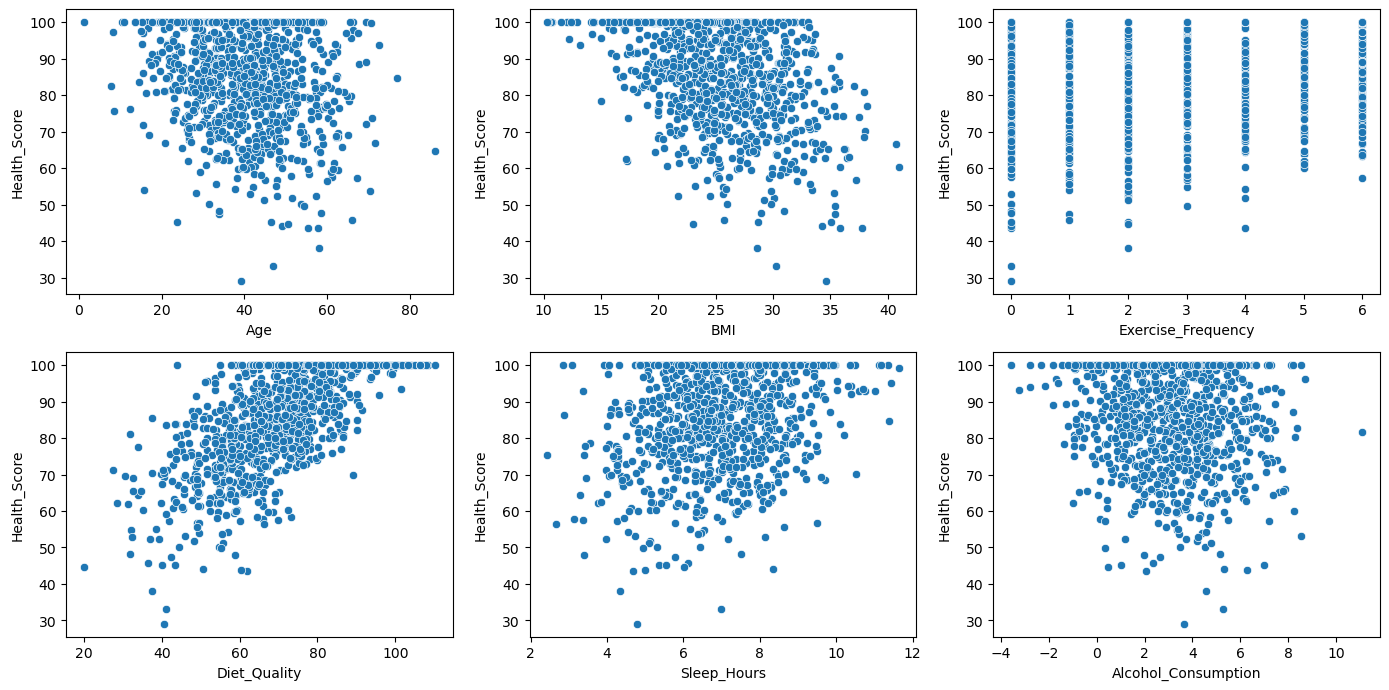

In [13]:
features = ['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality',
              'Sleep_Hours', 'Alcohol_Consumption']

plt.figure(figsize=(14, 10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=hd[col], y=hd['Health_Score'])
    plt.xlabel(col)
    plt.ylabel("Health_Score")
plt.tight_layout()
plt.show()

6.4  Correlation HeatMap:

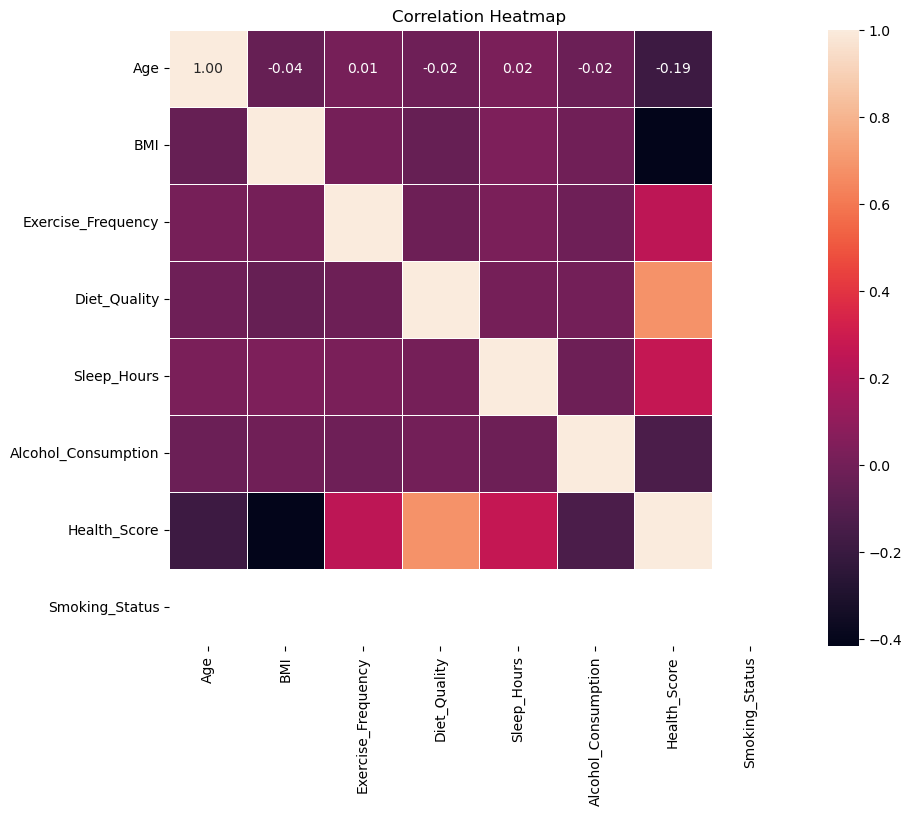

In [14]:
plt.figure(figsize=(10, 8))
corr = hd[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

7. Assumption Check:

7.1 Linearity Check: 

In [15]:
hd.corr()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
Age,1.000000,-0.040400,0.011829,-0.016554,0.023491,NaN,-0.023532,-0.186939
BMI,-0.040400,1.000000,0.007113,-0.039968,0.034498,NaN,-0.011069,-0.415147
Exercise_Frequency,0.011829,0.007113,1.000000,-0.021836,0.022106,NaN,-0.011666,0.245036
Diet_Quality,-0.016554,-0.039968,-0.021836,1.000000,0.009629,NaN,0.000146,0.680686
Sleep_Hours,0.023491,0.034498,0.022106,0.009629,1.000000,NaN,-0.020747,0.269033
Smoking_Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol_Consumption,-0.023532,-0.011069,-0.011666,0.000146,-0.020747,NaN,1.000000,-0.138264
Health_Score,-0.186939,-0.415147,0.245036,0.680686,0.269033,NaN,-0.138264,1.000000


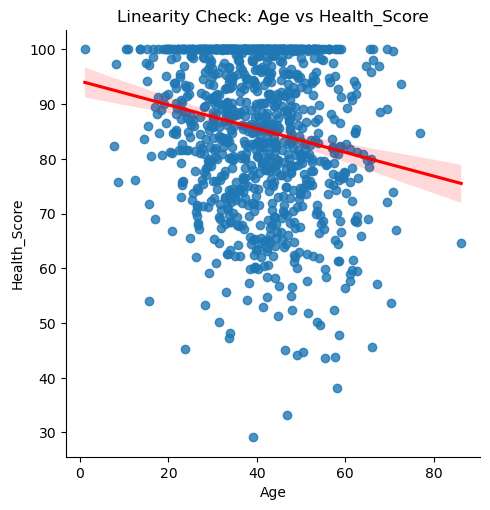

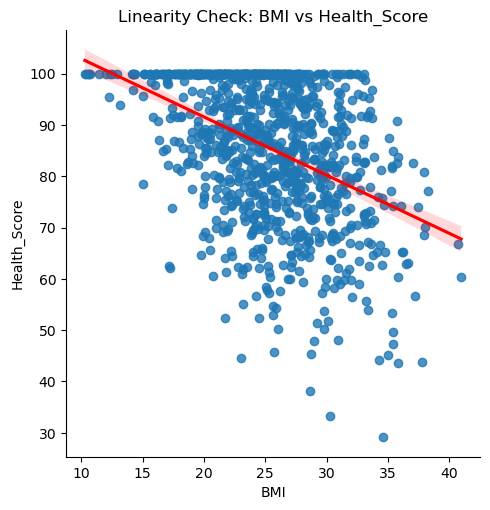

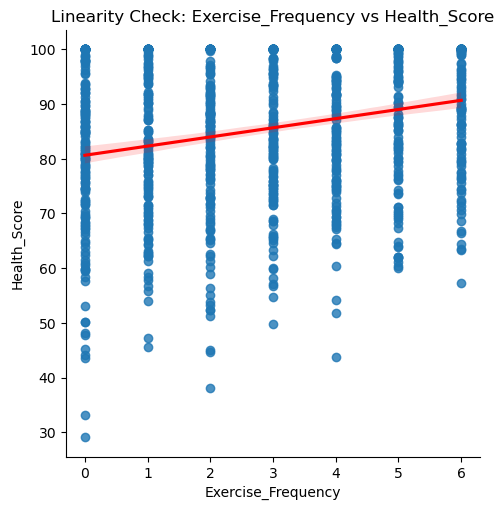

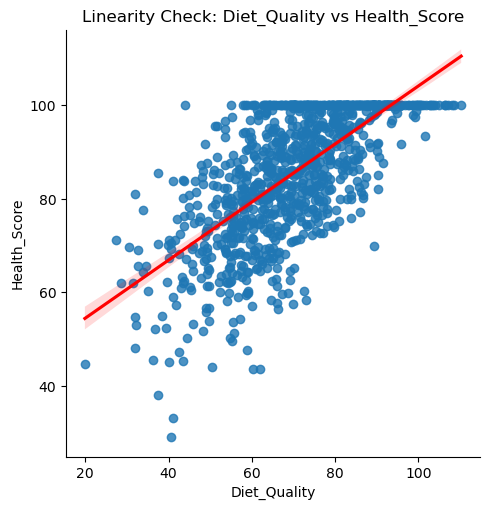

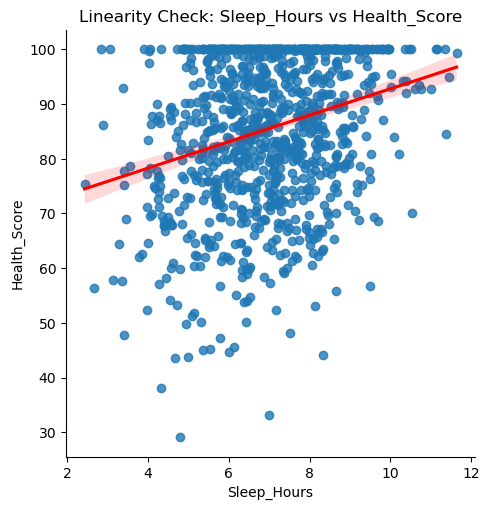

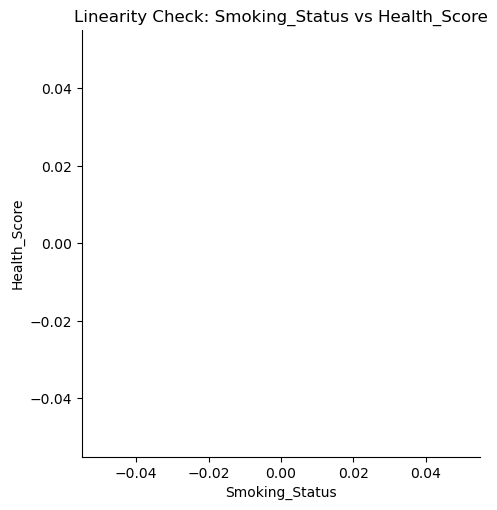

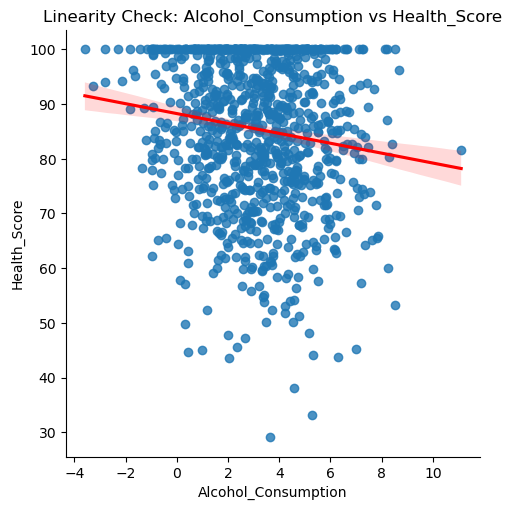

In [16]:
features = [
    'Age', 'BMI', 'Exercise_Frequency',
    'Diet_Quality', 'Sleep_Hours',
    'Smoking_Status', 'Alcohol_Consumption'
]

target = 'Health_Score'

# Linearity check using lmplot
for col in features:
    sns.lmplot(x=col, y=target, data=hd, line_kws={'color': 'red'})
    plt.title(f"Linearity Check: {col} vs {target}")
    plt.show()

7.2 MultiCollinearity Check:

In [17]:
hd.corr()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
Age,1.000000,-0.040400,0.011829,-0.016554,0.023491,NaN,-0.023532,-0.186939
BMI,-0.040400,1.000000,0.007113,-0.039968,0.034498,NaN,-0.011069,-0.415147
Exercise_Frequency,0.011829,0.007113,1.000000,-0.021836,0.022106,NaN,-0.011666,0.245036
Diet_Quality,-0.016554,-0.039968,-0.021836,1.000000,0.009629,NaN,0.000146,0.680686
Sleep_Hours,0.023491,0.034498,0.022106,0.009629,1.000000,NaN,-0.020747,0.269033
Smoking_Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol_Consumption,-0.023532,-0.011069,-0.011666,0.000146,-0.020747,NaN,1.000000,-0.138264
Health_Score,-0.186939,-0.415147,0.245036,0.680686,0.269033,NaN,-0.138264,1.000000


7.3 Auto Regression Check:

7.4 Normality Check: 

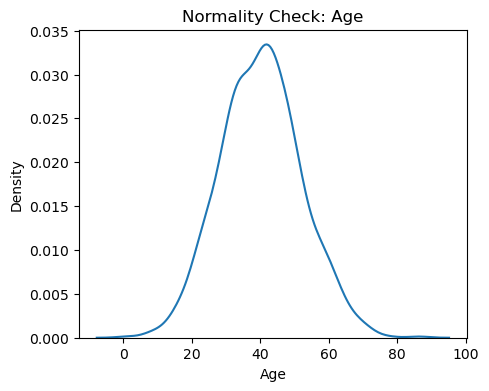

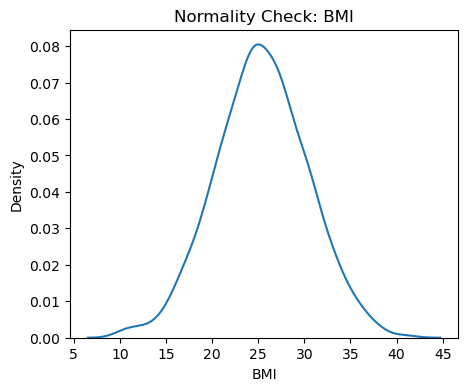

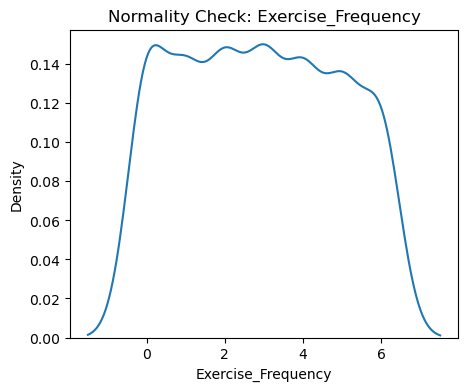

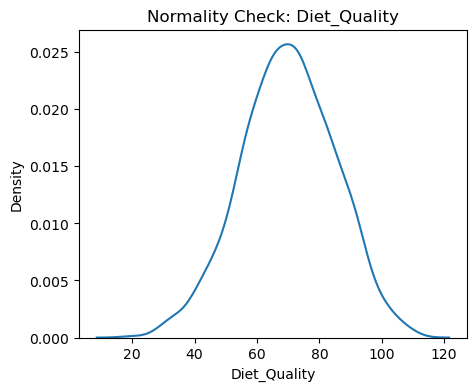

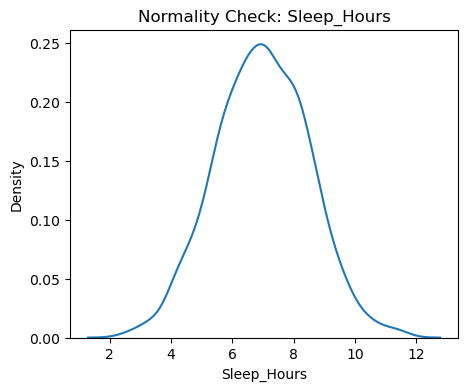

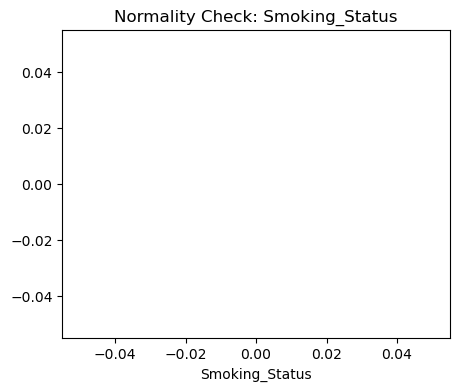

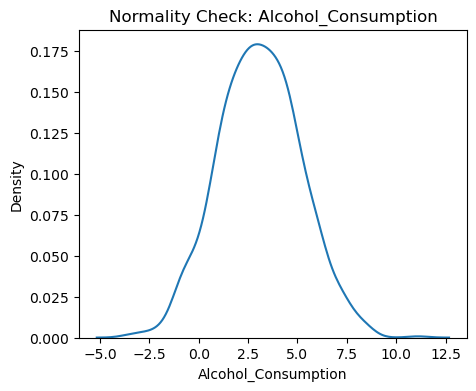

In [18]:
for col in features:
    plt.figure(figsize=(5, 4))
    sns.distplot(hd[col],hist=False)
    plt.title(f"Normality Check: {col}")
    plt.show()


8.ML Model for Multi-linear Regression:

In [19]:
hd.isna().sum()

Age                       0
BMI                       0
Exercise_Frequency        0
Diet_Quality              0
Sleep_Hours               0
Smoking_Status         1000
Alcohol_Consumption       0
Health_Score              0
dtype: int64

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error

# Columns we actually use in the model
model_cols = [
    'Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality',
    'Sleep_Hours', 'Smoking_Status', 'Alcohol_Consumption',
    'Health_Score'
]
hd = hd[model_cols].copy()
print("Original shape :", hd.shape)

Original shape : (1000, 8)


In [39]:
x = hd[['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality','Sleep_Hours', 'Smoking_Status', 'Alcohol_Consumption']]
y = hd['Health_Score']

In [40]:
x

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption
0,45.960570,31.996777,5,55.403270,7.300359,NaN,2.834707
1,38.340828,29.623168,6,41.838357,7.012419,NaN,7.199517
2,47.772262,25.298152,5,76.904948,6.028641,NaN,4.097944
3,58.276358,21.765316,2,49.756767,5.802714,NaN,3.649377
4,37.190160,28.491117,2,44.218737,7.912548,NaN,2.839795
...,...,...,...,...,...,...,...
995,36.626796,30.350751,1,60.674477,8.470913,NaN,3.823116
996,61.572238,24.867394,3,66.527725,5.355398,NaN,5.597395
997,47.690114,20.590627,4,69.819819,8.641864,NaN,8.195167
998,33.145852,24.184665,6,70.724204,7.941557,NaN,3.676134


In [41]:
y

0       70.542122
1       57.244637
2       96.333722
3       61.321783
4       67.175894
          ...    
995     67.993747
996     72.377621
997    100.000000
998    100.000000
999     87.995811
Name: Health_Score, Length: 1000, dtype: float64

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=35)

In [43]:
mlr = LinearRegression()

In [ ]:
mlr.fit(x_train,

In [ ]:
y_train_pred = mlr.predict(x_train)
y_test_pred  = mlr.predict(x_test)

In [ ]:
train_r2  = r2_score(y_train, y_train_pred)
print("Training R2  :", train_r2)

In [ ]:
test_r2   = r2_score(y_test, y_test_pred)
print("Testing  R2  :", test_r2)

In [ ]:
mse=mean_squared_error(y_test,y_test_pred)
print("MSE :",mse)

In [ ]:
rmse = root_mean_squared_error(y_test,y_test_pred)
print("RMSE :",rmse)

In [ ]:
mae = mean_absolute_error(y_test,y_test_pred)
print("MAE :",mae)

In [ ]:
mape = mean_absolute_percentage_error(y_test,y_test_pred)
print("MAPE :",mape)

In [ ]:
error_train = y_train - y_train_pred
error_train

In [ ]:
error_test = y_test - y_test_pred
error_test

7.5 Homoscedsicity check:

In [ ]:
# Plot homoscedasticity check for each feature
for col in features:
    plt.figure(figsize=(5,4))
    plt.scatter(x = x_test[col], y = error_test)
    plt.title(f'Homoscedasticity Check - {col} vs Residuals')
    plt.xlabel(col)
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.show()

Residuals Normality Check:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
res = error_test.to_numpy()
res = res[np.isfinite(res)]

# Distplot for normality check
plt.figure(figsize=(6,4))
sns.distplot(res,hist=False)
plt.title("Normality Check - Residuals (Distplot)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

Ridge and Lasso Regression 

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(x_test)


In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(x_test)


Compare all three models

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# MLR Predictions 
y_pred_lr = mlr.predict(x_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Ridge Regression R2 :", r2_score(y_test, y_pred_ridge))
print("Lasso Regression R2 :", r2_score(y_test, y_pred_lasso))

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Ridge RMSE          :", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Lasso RMSE          :", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Feature Importance Comparison

In [ ]:
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'LinearRegression': mlr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

coefficients
